# Diwali Sales Analysis

---

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

## Data Cleaning

In [129]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

In [130]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [132]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [133]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [134]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [135]:
df.dropna(inplace=True)

In [136]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [137]:
df['Amount'] = df['Amount'].astype(int)

In [138]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [139]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


---

## EDA

### Gender


- Plotting a bar graph for Gender

Text(0, 0.5, 'Count')

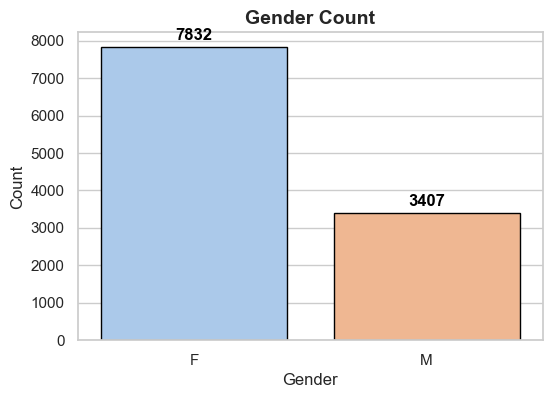

In [140]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Gender", data=df, palette="pastel", edgecolor="black", hue="Gender")

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", padding=3, fontsize=12, color="black", weight="bold")

# Improve title and labels
plt.title("Gender Count", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)


- Plotting a bar graph for Gender vs Total Amount

Text(0, 0.5, 'Count')

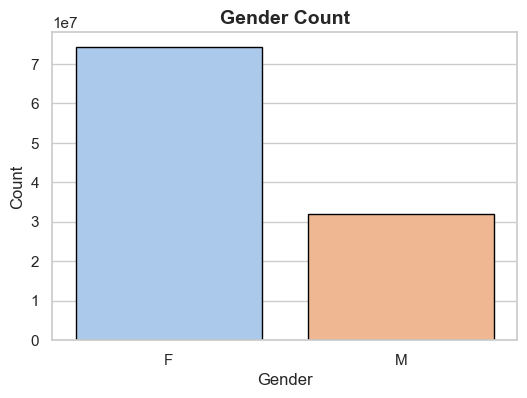

In [141]:
plt.figure(figsize=(6, 4))
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender', y = 'Amount', data=sales_gen, palette="pastel", edgecolor="black", hue="Gender")

plt.title("Gender Count", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

- From above graphs we can see that most of the buyers are **females and even the purchasing power of females are greater than men

### Age

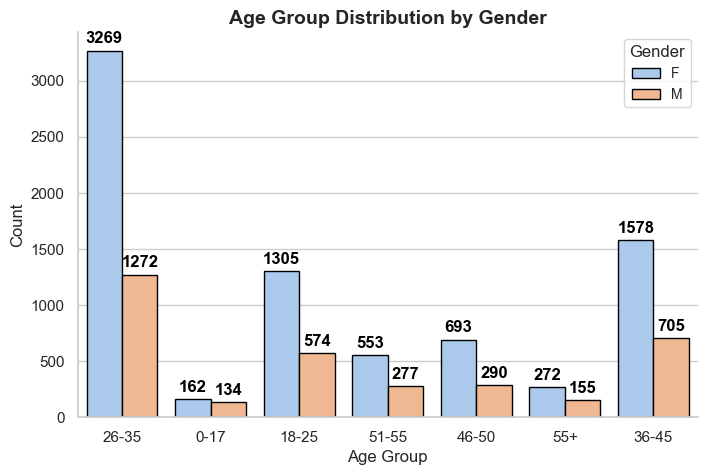

In [142]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Age Group", hue="Gender", data=df, palette="pastel", edgecolor="black")

# Add Labels to Bars
for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", padding=3, fontsize=12, color="black", weight="bold")

# Improve Title and Labels
plt.title("Age Group Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjust Legend
plt.legend(title="Gender", fontsize=10, title_fontsize=12)

# Remove Top and Right Borders
sns.despine()

- Total Amount vs Age Group

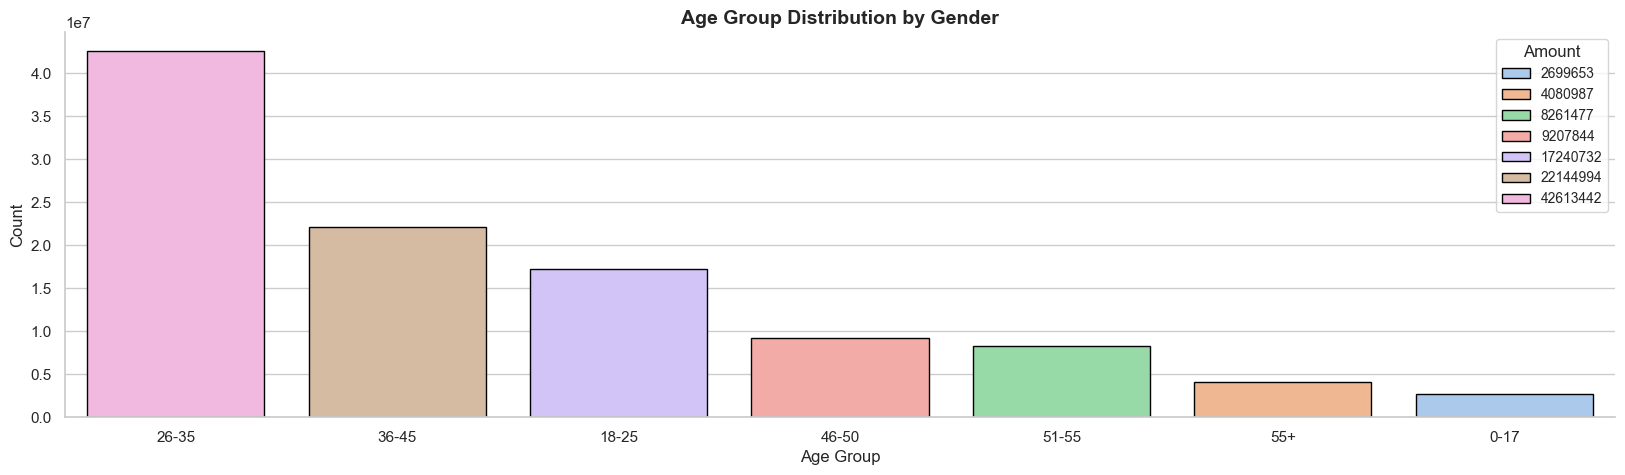

In [143]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount', data=sales_age, palette="pastel", edgecolor="black", hue='Amount')

plt.title("Age Group Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.legend(title="Amount", fontsize=10, title_fontsize=12)

sns.despine()

- From above graphs we can see that most of the buyers are of age group between *26-35* years female

### State

- Total number of orders from top 10 states

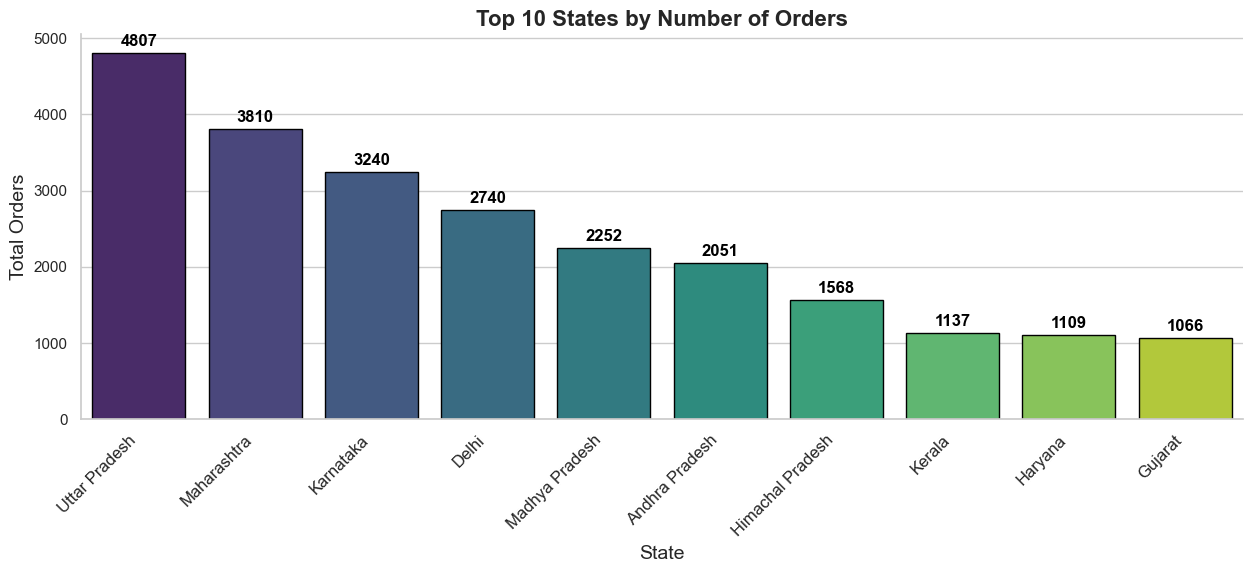

In [144]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(15, 5))
ax = sns.barplot(data=sales_state, x='State', y='Orders', palette="viridis", edgecolor="black", hue='State')

# Add Labels to Bars
for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", padding=3, fontsize=12, color="black", weight="bold")

# Improve Title and Labels
plt.title("Top 10 States by Number of Orders", fontsize=16, fontweight="bold")
plt.xlabel("State", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)

# Rotate X-axis Labels for Readability
plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

- Total amount/sales from top 10 states

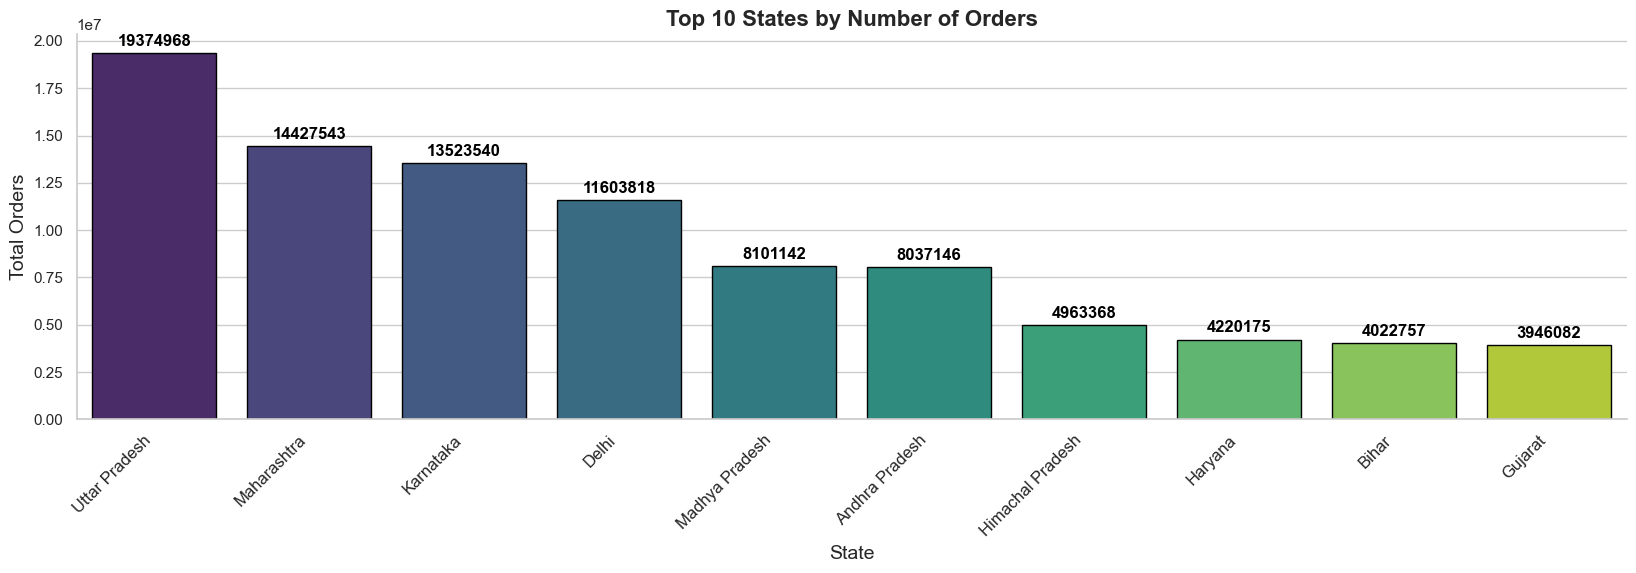

In [145]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

ax = sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette="viridis", edgecolor="black", hue="State")

for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", padding=3, fontsize=12, color="black", weight="bold")

plt.title("Top 10 States by Number of Orders", fontsize=16, fontweight="bold")
plt.xlabel("State", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)

# Rotate X-axis Labels for Readability
plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

- From above graphs we can see that most of the orders & total sales/amount are from **Uttar Pradesh, Maharashtra** and **Karnataka** respectively

### Marital Status

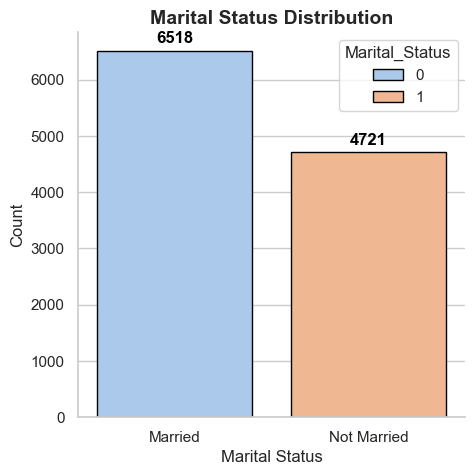

In [146]:
# ax = sns.countplot(data = df, x = 'Marital_Status')

# sns.set(rc={'figure.figsize':(5,5)})
# for bars in ax.containers:
#     ax.bar_label(bars)

plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x='Marital_Status', palette="pastel", edgecolor="black", hue="Marital_Status")

for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", padding=3, fontsize=12, color="black", weight="bold")

ax.set_xticks([0, 1])
ax.set_xticklabels(["Married", "Not Married"])
plt.title("Marital Status Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

sns.despine()

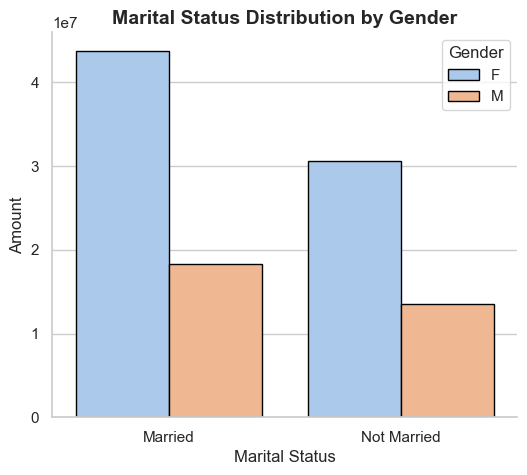

In [147]:
plt.figure(figsize=(6, 5))

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender', palette="pastel", edgecolor="black")

ax.set_xticks([0, 1])  # Set the tick positions for 
ax.set_xticklabels(["Married", "Not Married"])  # Set custom labels
plt.title("Marital Status Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Amount", fontsize=12)

sns.despine()

- From above graphs we can see that most of the buyers are **married (women)** and they have high purchasing power

### Occupation

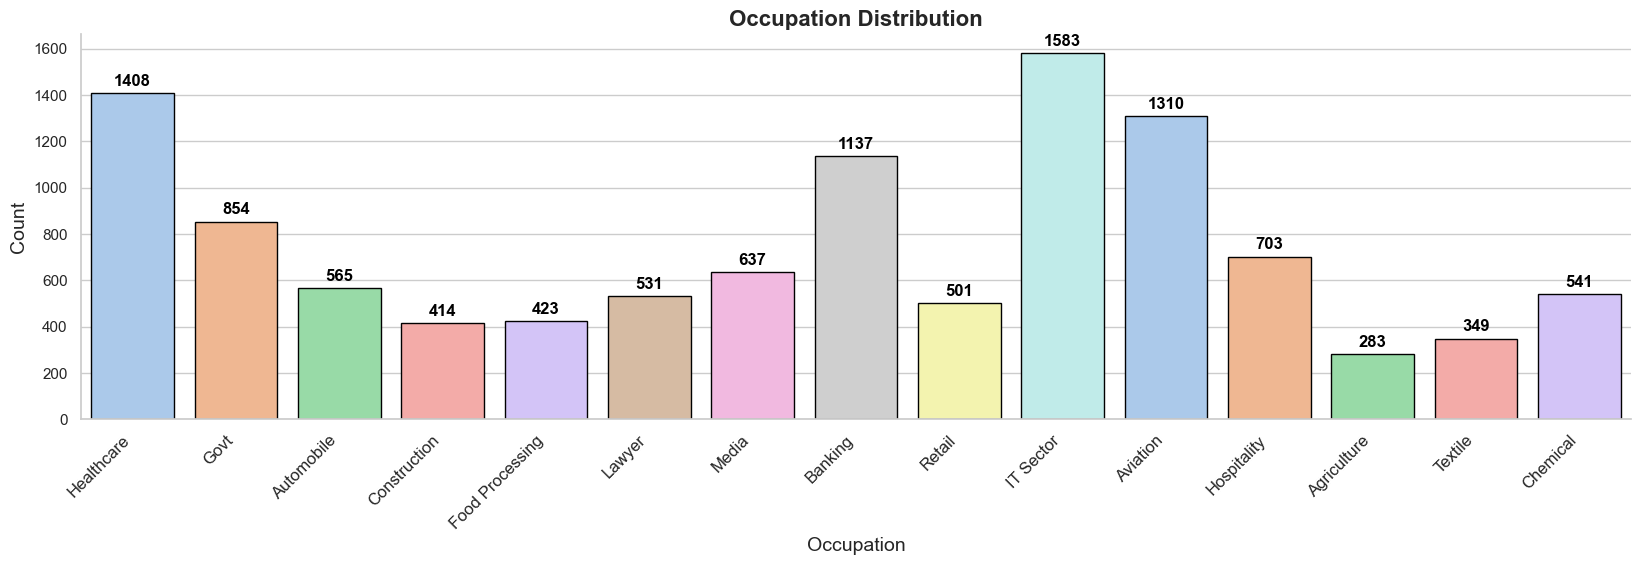

In [148]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(data=df, x='Occupation', palette="pastel", edgecolor="black", hue="Occupation")

for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", padding=3, fontsize=12, color="black", weight="bold")

plt.title("Occupation Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

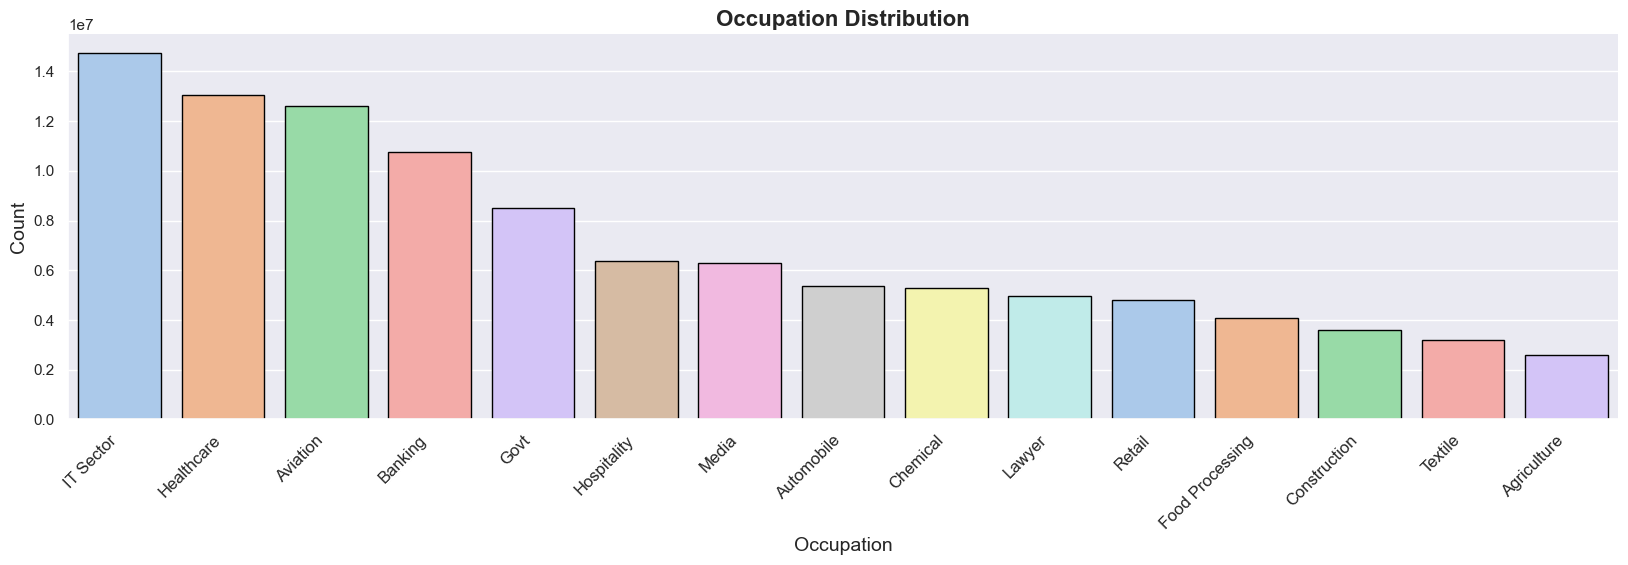

In [149]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount',  palette="pastel", edgecolor="black", hue="Occupation")

# Improve Title and Labels
plt.title("Occupation Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate X-axis Labels for Readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Remove Top and Right Borders
sns.despine()

- From above graphs we can see that most of the buyers are working in **IT, Healthcare** and **Aviation** sector.

### Product Category

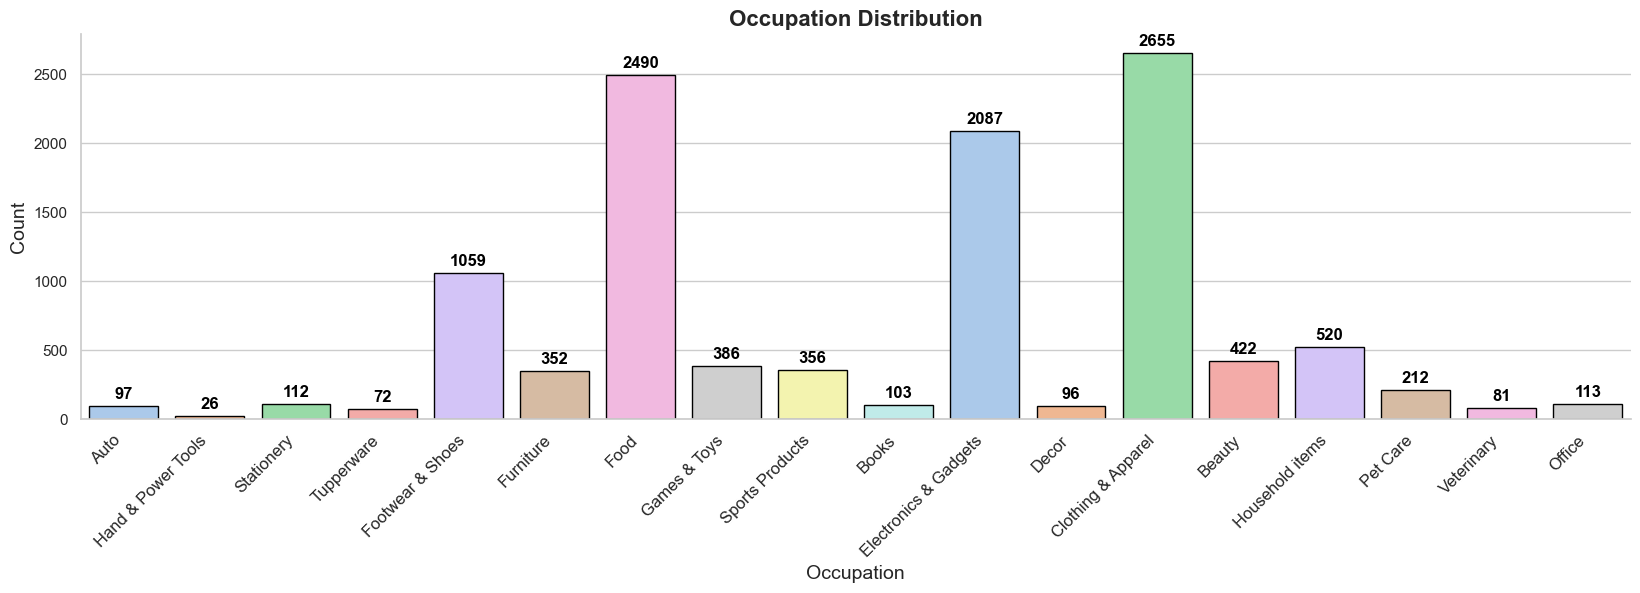

In [150]:
plt.figure(figsize=(20, 5))

ax = sns.countplot(data = df, x = 'Product_Category', palette="pastel", edgecolor="black", hue='Product_Category', legend=False)

for bars in ax.containers:
    ax.bar_label(bars, fmt="%d", padding=3, fontsize=12, color="black", weight="bold")

plt.title("Occupation Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

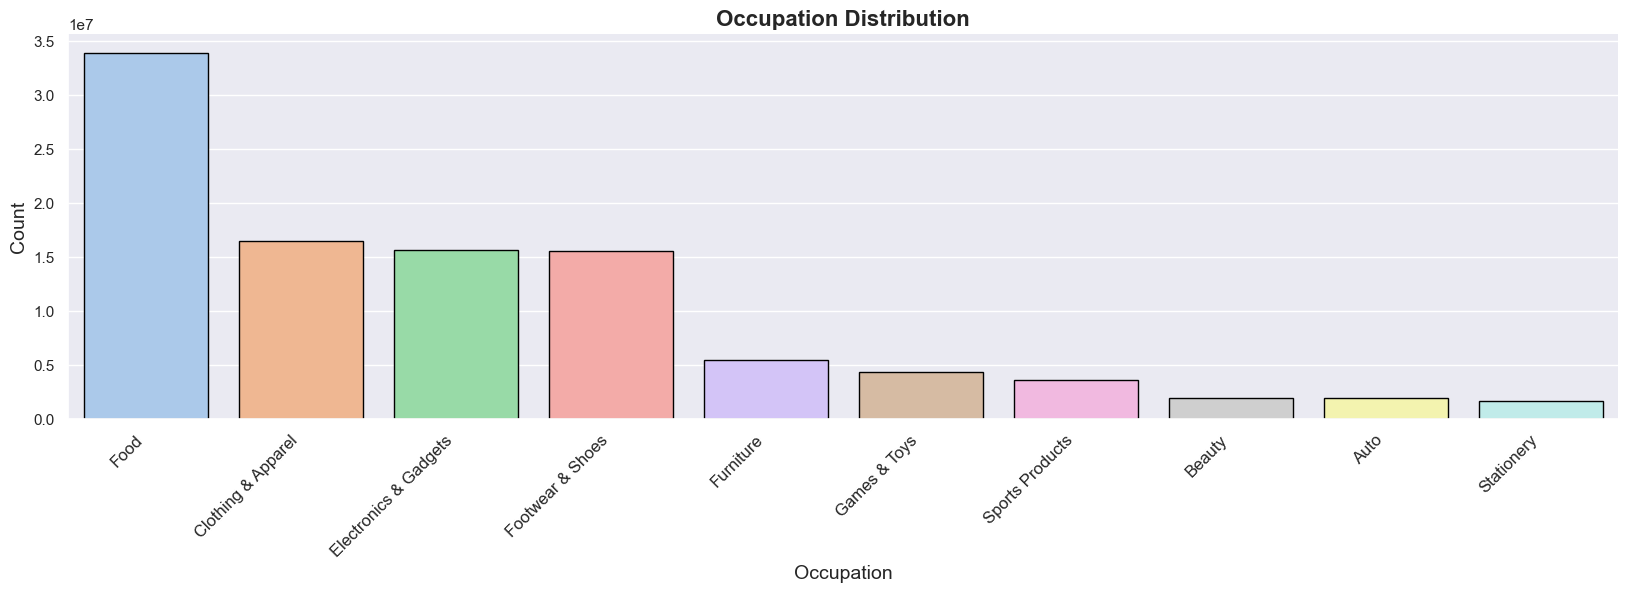

In [158]:
sns.set(rc={'figure.figsize':(20,5)})

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', palette="pastel", edgecolor="black", hue='Product_Category', legend=False)

# Improve Title and Labels
plt.title("Occupation Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate X-axis Labels for Readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Remove Top and Right Borders
sns.despine()

- Top 10 most sold products

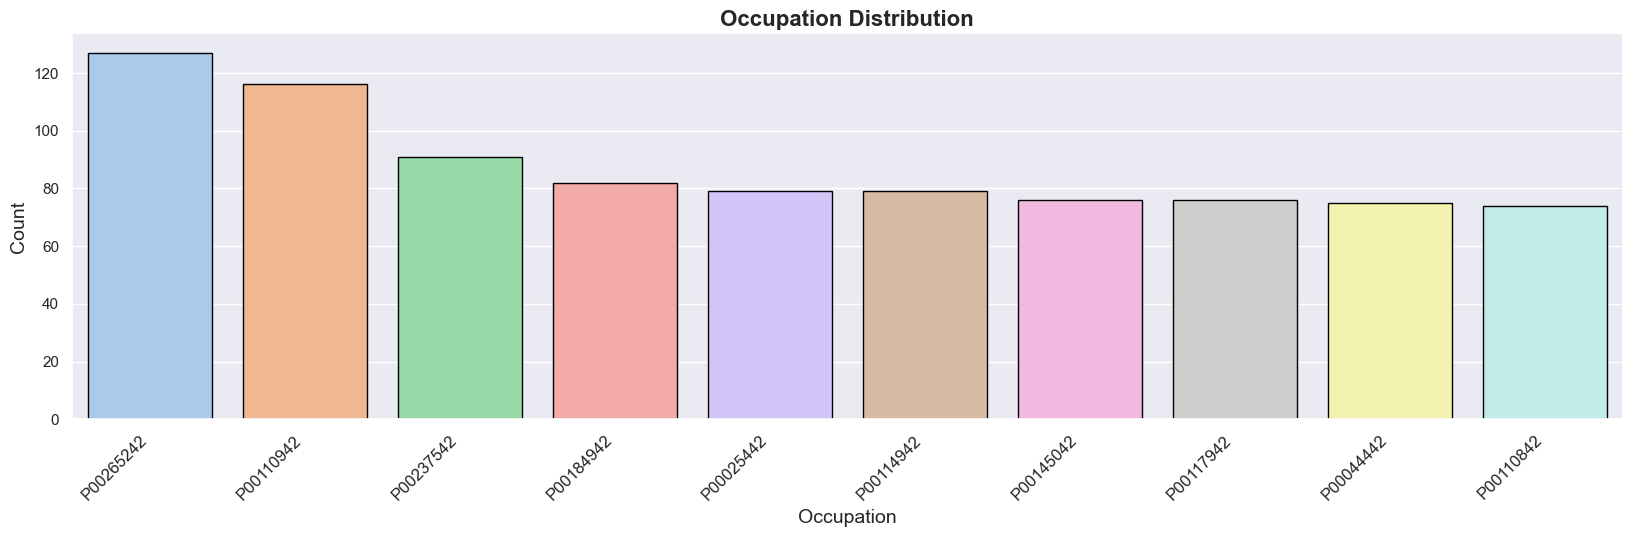

In [152]:
sns.set(rc={'figure.figsize':(20,5)})

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', palette="pastel", edgecolor="black", hue='Product_ID', legend=False)

# Improve Title and Labels
plt.title("Occupation Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate X-axis Labels for Readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Remove Top and Right Borders
sns.despine()

## Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

---